# Complex convolution and relationship with Fourier transform

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()

The **convolution** of two functions is a new function that represents (at each point) the integral of the product of the first function with a reversed, time-shifted version of the second function:

$$(f * g )(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) d\tau$$

To aid understanding, it may be helpful to visualize the convolution of some simple functions, as show in the [wikipedia article](https://en.wikipedia.org/wiki/Convolution) for convolution:

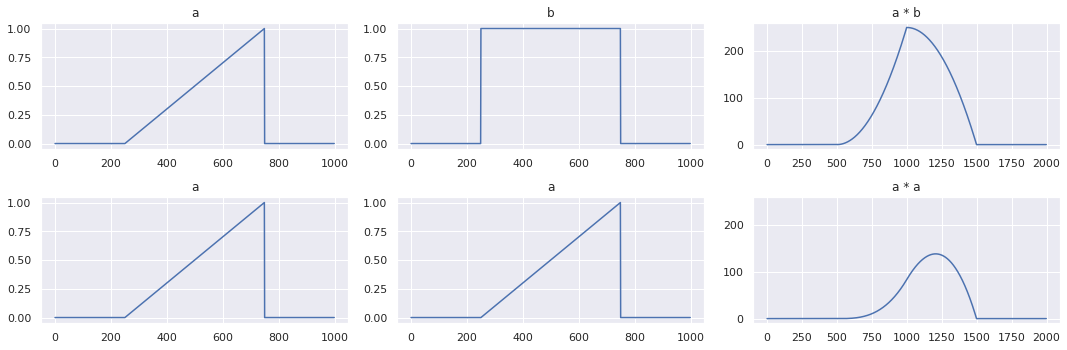

In [70]:
length = 1000

# sawtooth
a = np.zeros(length)
quarter = int(length/4)
a[quarter:3*quarter] = np.linspace(0,1,2*quarter)

# square pulse
b = np.zeros(length)
quarter = int(length/4)
b[quarter:3*quarter] = 1.0

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15,5))
ax[0,0].plot(a)
ax[0,0].set_title('a')
ax[0,1].plot(b)
ax[0,1].set_title('b')
ax[0,2].plot(np.convolve(b,a))
ax[0,2].set_title('a * b')
#ax[0,2].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax[0,2].set(ylim=(-10, 260))

ax[1,0].plot(a)
ax[1,0].set_title('a')
ax[1,1].plot(a)
ax[1,1].set_title('a')
ax[1,2].plot(np.convolve(a,a))
ax[1,2].set_title('a * a')
ax[1,2].set(ylim=(-10, 260))

fig.tight_layout(pad=1)

## Convolution with complex-valued functions

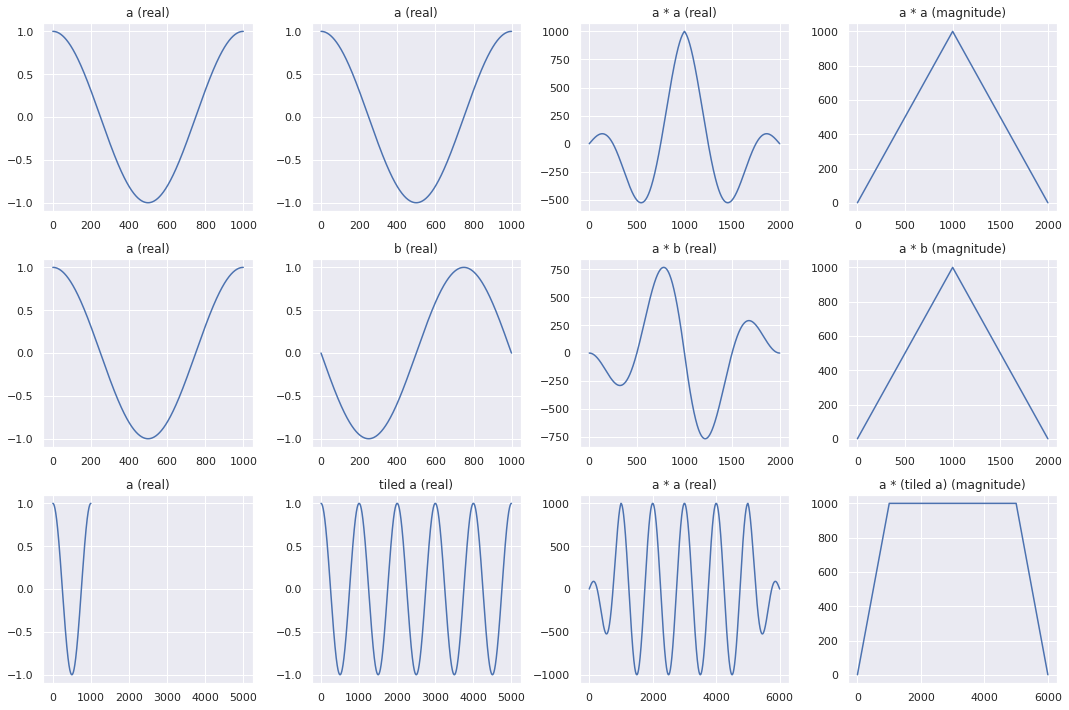

In [71]:
length = 1000
cycles = 1
t = np.linspace(0, 2*np.pi*cycles, int(length))

# Complex sinusoid (a)
a = np.exp(-1j*t)

# Complex sinusoid with phase shift (b)
b = np.exp(-1j*(t + np.pi/2))

# # Complex sinusoid at a different frequency:
# new_freq = 1.3
# b = np.exp(-1j*new_freq*t)

# Plot:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(15,10))

warnings.filterwarnings('ignore') # suppress warnings about pyplot casting complex #s as real

ax[0,0].plot(a)
ax[0,0].set_title('a (real)')
ax[0,1].plot(a)
ax[0,1].set_title('a (real)')
ax[0,2].plot(np.convolve(a,a))
ax[0,2].set_title('a * a (real)')
ax[0,3].plot(np.abs(np.convolve(a,a)))
ax[0,3].set_yscale('linear')
ax[0,3].set_title('a * a (magnitude)')

ax[1,0].plot(a)
ax[1,0].set_title('a (real)')
ax[1,1].plot(b)
ax[1,1].set_title('b (real)')
ax[1,2].plot(np.convolve(a,b))
ax[1,2].set_title('a * b (real)')
ax[1,3].plot(np.abs(np.convolve(a,b)))
ax[1,3].set_yscale('linear')
ax[1,3].set_title('a * b (magnitude)')

ax[2,0].plot(a)
ax[2,0].set_title('a (real)')
ax[2,1].plot(np.tile(a,5))
ax[2,1].set_title('tiled a (real)')
ax[2,0].set_xlim(ax[2,1].get_xlim())
ax[2,2].plot(np.convolve(a,np.tile(a, 5)))
ax[2,2].set_title('a * a (real)')
ax[2,3].plot(np.abs(np.convolve(np.tile(a,5),a)))
ax[2,3].set_yscale('linear')
ax[2,3].set_title('a * (tiled a) (magnitude)')
#ax[1,3].set_title(r"${\mid a * a \mid}$")

warnings.filterwarnings('default')

fig.tight_layout(pad=1)

### Takeaways:
1. The convolution of any function with a complex-valued function produces a **complex-valued function**
2. Progressing down the x-axis of the convolution result represents "slipping" through *phase-shifted* versions of a *time-reversed copy* of the second function.
3. The **magnitude** of the result is invariant to the "slip" (phase shift).  The only reason it's not constant is because of the "padding" added in order to allow slipping through. (see what happens with a * (tiled a)
4. Convolution is NOT what is happening with a **fourier transform**.  However, you can get some insight into what IS happening with a fourier transform by looking at the point of exact overlap (this is the max point in the a*a (magnitude) graph)
  + This represents the value of the **complex integral** (i.e., [contour integral](https://en.wikipedia.org/wiki/Contour_integration) parameterized on $t$) of the product of function 1 and function 2 with no padding/phase shift
  + When function 2 is a **complex sinusoid**, the value of this integral is the value of the fourier transform of function 1 evaluated at the frequency (f) of the function 2 sinusoid
    + AKA the fourier coefficient for f
    + This is a complex number
    + The magnitude of this complex number represents the presence of frequency f in function 1